In [1]:
import matplotlib.pyplot as plt
import numpy as np

from starter import read_data, inplace_min_max_scaling, accuracy, knn_helper, calculate_downsample

from more_plots import conf_matrix_plot

KNN WITH RAW DATA

In [2]:
train_data = read_data('mnist_train.csv')
valid_data = read_data('mnist_valid.csv')
test_data = read_data('mnist_test.csv')

inplace_min_max_scaling(train_data)
inplace_min_max_scaling(test_data)
inplace_min_max_scaling(valid_data)

metrics = ['euclidean', 'cosim']

k_range = list(range(2, 11))
valid_accs = {metric: [] for metric in metrics}
train_accs = {metric: [] for metric in metrics}

for metric in metrics:
    for k in k_range:
        print()
        valid_accs[metric].append(accuracy(*knn_helper(train_data, valid_data, metric, k=k)))
        train_accs[metric].append(accuracy(*knn_helper(train_data, train_data, metric, k=k)))
        print()

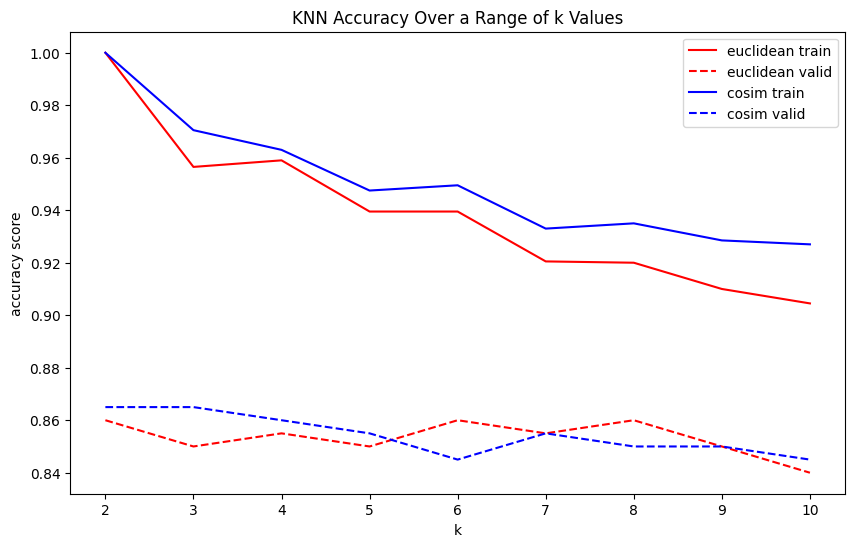

In [3]:
colors = ['red', 'blue']

plt.figure(figsize=(10, 6))

for idx, metric in enumerate(metrics):
    plt.plot(k_range, train_accs[metric], label=f"{metric} train", color=colors[idx], linestyle="-")

    plt.plot(k_range, valid_accs[metric], label=f"{metric} valid", color=colors[idx], linestyle="--")

    plt.xticks(k_range)

    plt.title('KNN Accuracy Over a Range of k Values')
    plt.xlabel('k')
    plt.ylabel('accuracy score')

    plt.legend()

plt.show()

In [4]:
np.argmax(valid_accs['euclidean'])

np.int64(0)

In [5]:
np.argmax(valid_accs['cosim'])

np.int64(0)


TEST SET ACCURACY FOR euclidean WITH K=6: 0.885
        0  1  2  3  4  5  6  7  8  9


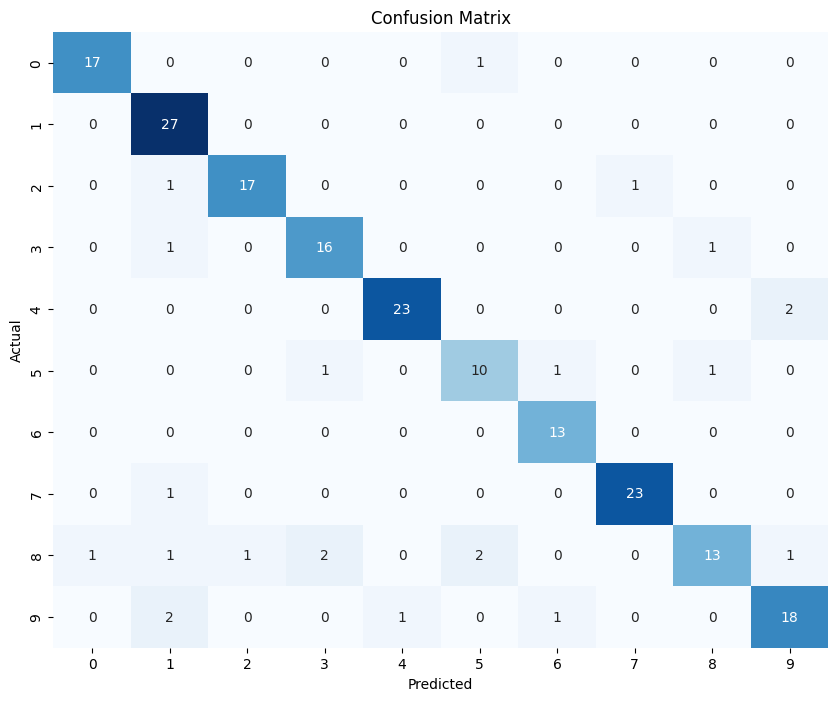



TEST SET ACCURACY FOR cosim WITH K=7: 0.915
        0  1  2  3  4  5  6  7  8  9


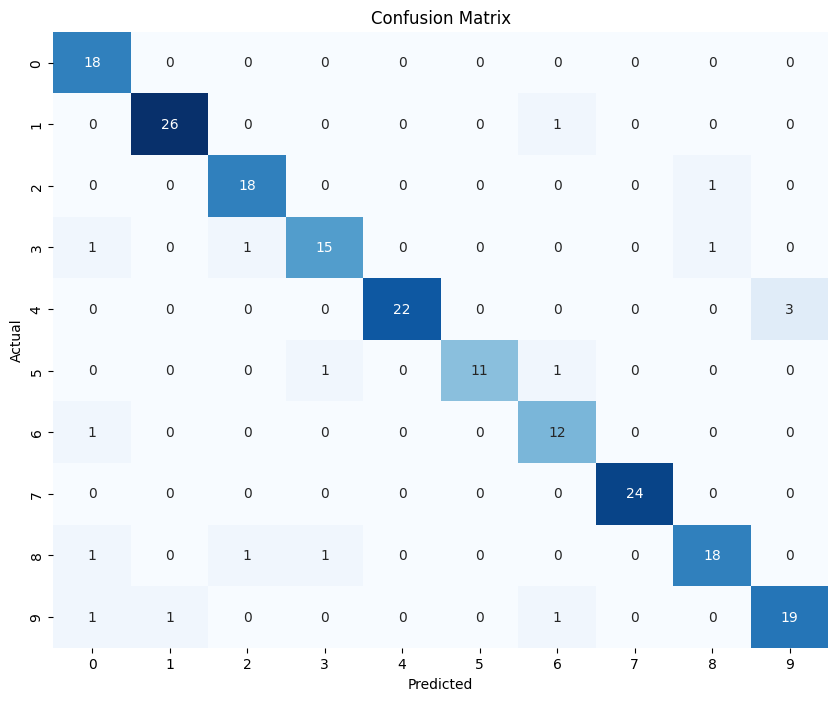

In [6]:
best_k = {'euclidean': 6, 'cosim': 7}

for metric in metrics:
    print()
    act, pred = knn_helper(train_data, test_data, metric, k=best_k[metric])
    print(f'TEST SET ACCURACY FOR {metric} WITH K={best_k[metric]}:', accuracy(act, pred))
    conf_matrix_plot(act, pred)
    print()

KNN WITH DOWNSAMPLED DATA

In [7]:
train_data = read_data('mnist_train.csv')
valid_data = read_data('mnist_valid.csv')
test_data = read_data('mnist_test.csv')

inplace_min_max_scaling(train_data)
inplace_min_max_scaling(test_data)
inplace_min_max_scaling(valid_data)

calculate_downsample(train_data) # inplace calculation of downsample -- reduces the dataset by half exactly
calculate_downsample(valid_data)
calculate_downsample(test_data)

metrics = ['euclidean', 'cosim']

k_range = list(range(2, 11))
valid_accs = {metric: [] for metric in metrics}
train_accs = {metric: [] for metric in metrics}

for metric in metrics:
    for k in k_range:
        print()
        valid_accs[metric].append(accuracy(*knn_helper(train_data, valid_data, metric, k=k)))
        train_accs[metric].append(accuracy(*knn_helper(train_data, train_data, metric, k=k)))
        print()

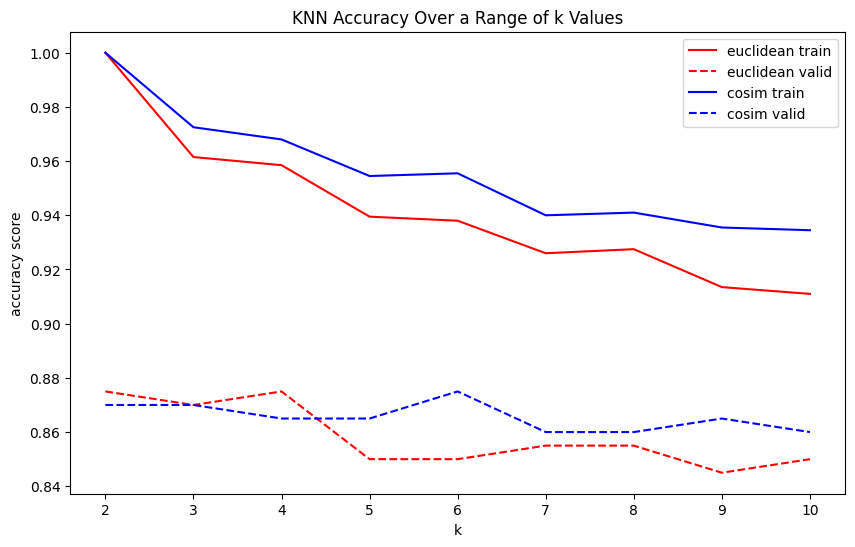

In [12]:
colors = ['red', 'blue']

plt.figure(figsize=(10, 6))

for idx, metric in enumerate(metrics):
    plt.plot(k_range, train_accs[metric], label=f"{metric} train", color=colors[idx], linestyle="-")

    plt.plot(k_range, valid_accs[metric], label=f"{metric} valid", color=colors[idx], linestyle="--")

    plt.xticks(k_range)

    plt.title('KNN Accuracy Over a Range of k Values')
    plt.xlabel('k')
    plt.ylabel('accuracy score')

    plt.legend()

plt.show()

In [13]:
np.argmax(valid_accs['euclidean'])

np.int64(0)

In [14]:
np.argmax(valid_accs['cosim'])

np.int64(4)


TEST SET ACCURACY FOR euclidean WITH K=4: 0.9
        0  1  2  3  4  5  6  7  8  9


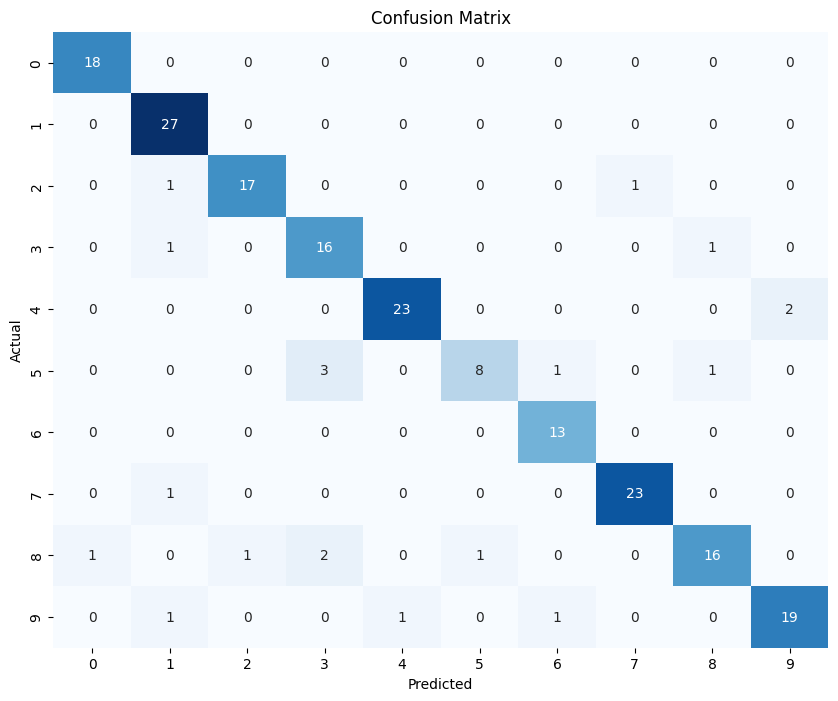



TEST SET ACCURACY FOR cosim WITH K=6: 0.935
        0  1  2  3  4  5  6  7  8  9


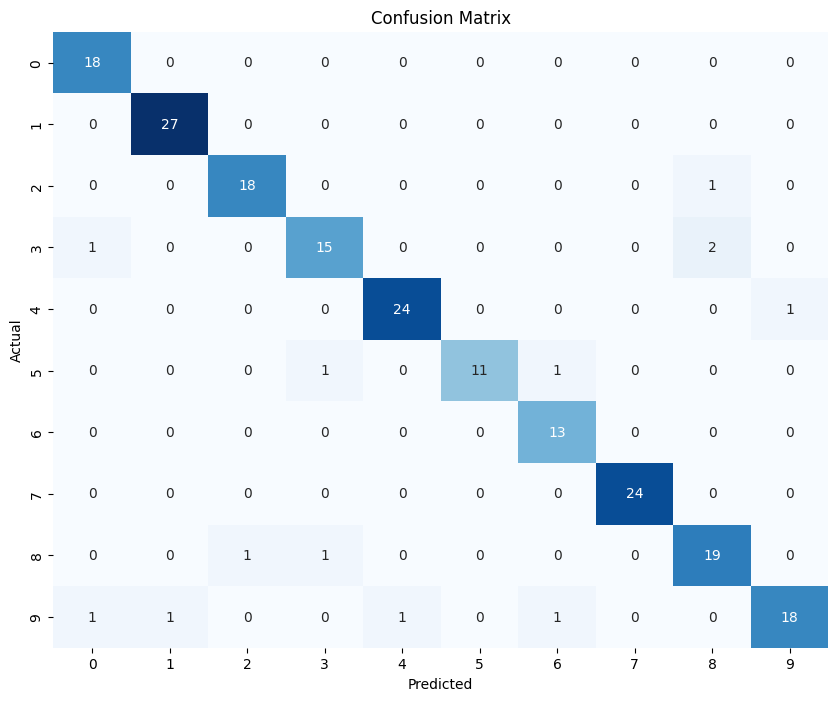

In [16]:
best_k = {'euclidean': 4, 'cosim': 6}

for metric in metrics:
    print()
    act, pred = knn_helper(train_data, test_data, metric, k=best_k[metric])
    print(f'TEST SET ACCURACY FOR {metric} WITH K={best_k[metric]}:', accuracy(act, pred))
    conf_matrix_plot(act, pred)
    print()